# 3 Fashion MNIST

+ mnist : 머신러닝의 고전적인 문제로 숫자를 손으로 쓴 글자를 모아놓은 데이터세트
+ fashion mnist : 옷, 신발, 가방등의 28*28 픽셀의 이미지 데이타세트

                            [ Fashion MNIST 의 범주 ]
    <table>
        <tr><th>라벨</th><th>범주</th></tr>
    <tr><td>0</td><td>티셔츠(상의)</td></tr>
    <tr><td>1</td><td>바지</td></tr>
    <tr><td>2</td><td>스웨터</td></tr>
    <tr><td>3</td><td>드레스</td></tr>
    <tr><td>4</td><td>코트</td></tr>
    <tr><td>5</td><td>샌들</td></tr>
    <tr><td>6</td><td>셔츠</td></tr>
    <tr><td>7</td><td>운동화</td></tr>
    <tr><td>8</td><td>가방</td></tr>
    <tr><td>9</td><td>부츠</td></tr>
    </table>
        

In [1]:
# (1) Fashion MNIST 데이터셋 불러오기

import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4423680/4422102 [==============================] - 1s 0us/step
60000 10000


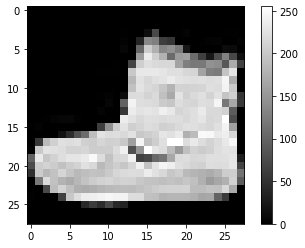

9


In [2]:
# (2) 데이터 확인
#      imshow() : 이미지를 그래프 형태로 표시
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])  # 정답(라벨)을 확인 ( 9 : 부츠)

In [3]:
# (3) 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])
# [결과] 모든 데이타가 0~1 사이의 값을 되도록 정규화가 잘 되었음을 확인

# 앞에서 to_categorical() 를 이용하여 one-hot encoding 작업을 했었는데 
# 10개의 답을 위해 [1 0 0 0 0 0 0 0 0 0] 으로 계산하는 것이 오히려 더 시스템 낭비일 수가 있다.
# 그래서 희소행렬을 이용하는데 categorical_crossentropy 손실율 계산시 sparse_categorical_crossentropy를 사용하여
# 데이타 전처리 없이 희소 행렬을 나타내는 데이타를 정답 행렬로 사용할 수 있다.

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

## Flatten

   + 이차원 배열을 일차원 배열로 바꿔주는 함수
   + 컨볼루션 층(Convolution layer)나 맥스플링(MaxPooling)은 주어진 이미지를 2차원 배열인 채로 다룬다.
     그 뒤 일반층으로 넘길 때 Flatten() 함수를 이용한다


In [4]:
# (4) Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# 희소행렬 : categorical_crossentropy -> sparse_categorical_crossentropy
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# (5) Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

# [결과]
# 훈련 데이터의 정확도가 점점 증가하는 것에 비해 검증 데이타의 정확도는 일정 수준으로 유지되고 있다.

Epoch 1/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6703 - accuracy: 0.7680 - val_loss: 0.4544 - val_accuracy: 0.8400
Epoch 2/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3984 - accuracy: 0.8585 - val_loss: 0.3843 - val_accuracy: 0.8630
Epoch 3/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3527 - accuracy: 0.8718 - val_loss: 0.3471 - val_accuracy: 0.8749
Epoch 4/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3244 - accuracy: 0.8804 - val_loss: 0.3493 - val_accuracy: 0.8745
Epoch 5/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3058 - accuracy: 0.8870 - val_loss: 0.3747 - val_accuracy: 0.8633
Epoch 6/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2887 - accuracy: 0.8924 - val_loss: 0.3337 - val_accuracy: 0.8803
Epoch 7/25
1407/1407 [==============================] - 2s 2ms/step - loss: 0.2694 - accuracy: 0.8996 - val_loss: 0.3497 - val_accuracy:

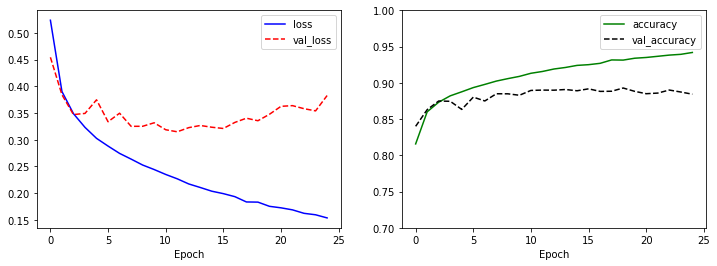

In [6]:
# (6) Fashion MNIST 분류 모델 학습 결과 시각화
#      history 변수에 저장된 학습결과를 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

# [결과]
# 검증 데이타의 손실이 감소하다가 시간이 지날수록 서서히 증가하려는 추세로 과적합 현상의 양상을 띈다.
# 이제 앞에서 확인한 tf.keras.callbacks.EarlyStopping을 이용한다면? 

In [7]:
# (7) Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

# [결과]
#  테스트 데이타에 대한 평가 정확도는 88.5%이다.
#  물론 괜찮은 수치이지만 더 정확도를 더 높일 수 있는 방법을 모색해야 하는 것이다. (딥러닝-CNN 등)

313/313 [==============================] - 0s 964us/step - loss: 0.4233 - accuracy: 0.8803


[0.42328256368637085, 0.880299985408783]